<center>
A laboratory work contains data preprocessing, 2 variants of cross-validation, the choice of optimal parameter for the Minkowski metric and the PCA sample
</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Using Titanic dataset from https://www.kaggle.com/c/titanic/data for demonstration of preprocessing and kNN method

In [2]:
data = pd.read_csv('titanic/passenger_data.csv', sep = ',', engine = 'python')

In [3]:
#data

#### Demonstration of depedencies of features

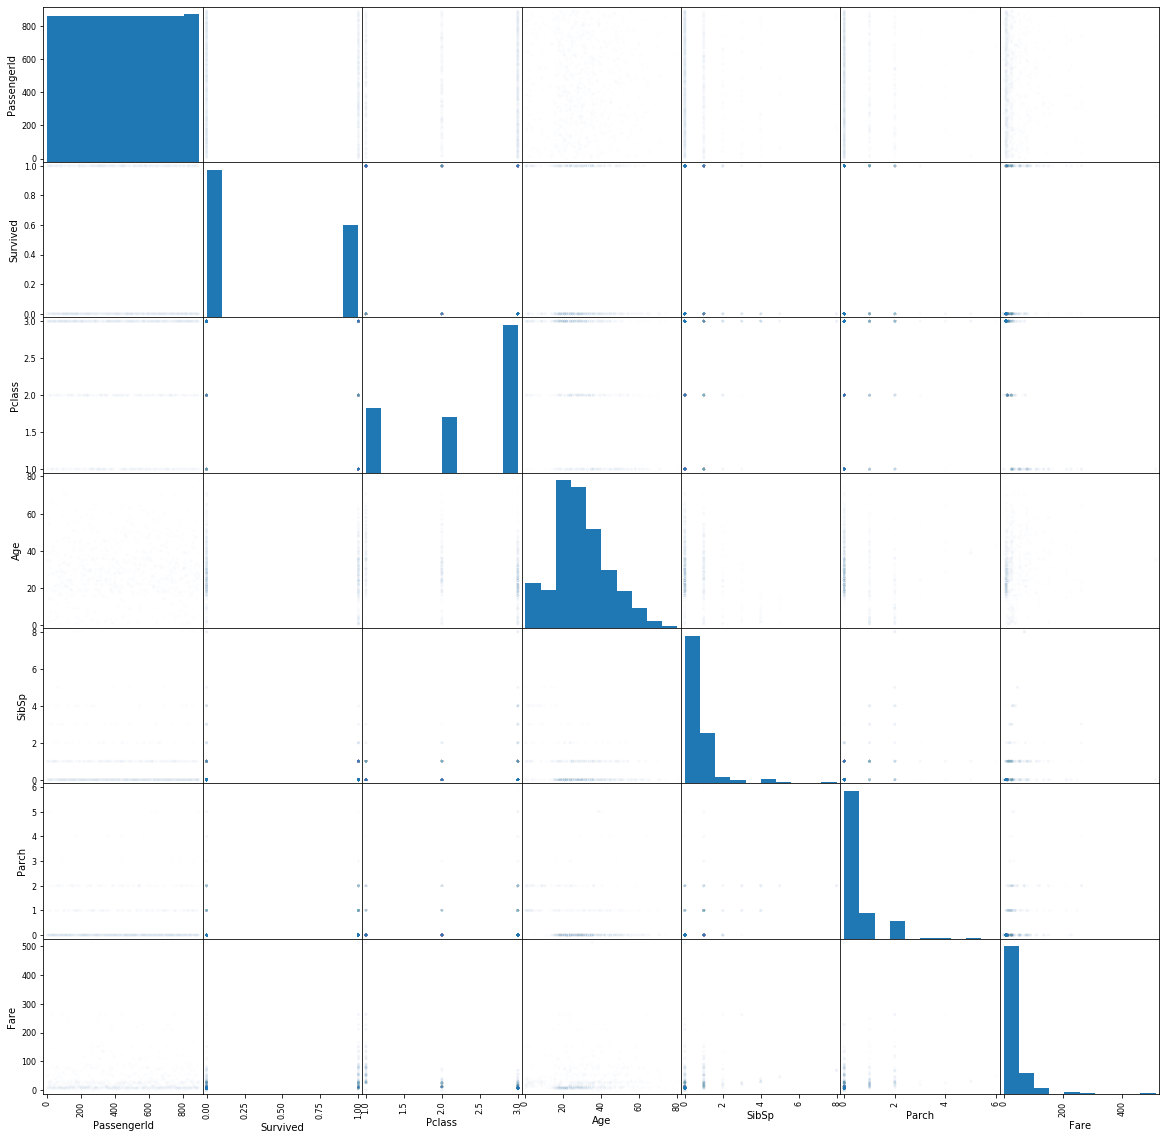

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

#### Cleaning dataset, excluding non-necessary features

In [5]:
data = data.drop("Name", axis = 1)
data = data.drop("PassengerId", axis = 1)

In [6]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Sex', 'Ticket', 'Cabin', 'Embarked']
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
# for c in categorical_columns:
#     print(c, data[c].unique())

In [8]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [9]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [10]:
data.describe(include = [object])

,Sex,Ticket,Cabin,Embarked
count,891,891,891,891
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,691,646


#### Binarisation of text feature

In [11]:
data.at[data['Sex'] == 'male', 'Sex'] = 0
data.at[data['Sex'] == 'female', 'Sex'] = 1
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [12]:
# data

In [13]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Sex'] ['Ticket', 'Cabin', 'Embarked']


In [14]:
binary_columns.append('Survived')

In [15]:
print(binary_columns, nonbinary_columns)

['Sex', 'Survived'] ['Ticket', 'Cabin', 'Embarked']


#### Vectorization

In [16]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
#print(data_nonbinary.columns)

In [17]:
numerical_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
numerical_columns.remove("Survived")

In [19]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


#### Standartization of numerical features

In [20]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Pclass,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00


#### Concatination of all features in a single table
#### Splitting matrix of features and target vector

In [21]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
#print(data.shape)
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Sex,Survived
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,-4.386066e-17,2.312653e-16,1.594933e-17,3.588600e-17,7.237009e-16,0.003367,0.003367,0.002245,0.001122,0.001122,...,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.725028,0.352413,0.383838
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.057961,0.057961,0.047351,0.033501,0.033501,...,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.446751,0.477990,0.486592
min,-1.565228e+00,-2.222908e+00,-4.742788e-01,-4.734077e-01,-6.480577e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.691575e-01,-5.654189e-01,-4.742788e-01,-4.734077e-01,-4.888737e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.269128e-01,-1.045787e-01,-4.742788e-01,-4.734077e-01,-3.571902e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.269128e-01,4.330683e-01,4.325504e-01,-4.734077e-01,-2.423274e-02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,8.269128e-01,3.889370e+00,6.780355e+00,6.970233e+00,9.661740e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
X = data.drop(('Survived'), axis = 1)
y = data['Survived']
feature_names = X.columns

#### Single fitting kNN

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.17656500802568217 0.208955223880597


In [26]:
err_test = 1 - knn.score(X_test, y_test)

#### An error of kNN method

In [27]:
err_test

0.20895522388059706

#### Cross-validation via grid of neighbors
#### and choising best amounth of neighbors

In [28]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1910112359550562 10


C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17656500802568217 0.208955223880597


#### A confusion matrix demonstrated below

In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))


[[146  11]
 [ 45  66]]


#### Another variant of cross-validation may be realized via cross_val_score function:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    tmp_scores = cross_val_score(knn, X_train, y_train, cv=kf.split(X_train), scoring='accuracy')
    tmp_scores = tmp_scores.mean()
#     print(k, tmp_scores)
    scores.append(tmp_scores)

#### optimal K for KNN was found:

In [32]:
opt_nightbors = scores.index(max(scores))+1
opt_nightbors

17

In [33]:
1-max(scores)

0.17498719918074757

In [34]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(X_train, y_train)

In [35]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.1653290529695024 0.20149253731343283


#### Lets try to find an optimal parameter *p* in the Minkowski metric
# $$\rho_p=\left(\sum|x_j-z_j|^p\right)^\frac{1}{p}$$
#### with fixed optimal amount of neighbors

In [36]:
p_mink_values= np.linspace(1, 5, 50)
p_mink_values = list(p_mink_values)

In [37]:
scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for p in p_mink_values:
    knn = KNeighborsClassifier(n_neighbors=opt_nightbors, metric='minkowski', p = p)
    tmp_scores = cross_val_score(knn, X_train, y_train, cv=kf.split(X_train), scoring='neg_mean_squared_error')
    tmp_scores = tmp_scores.mean()
#     print(p_mink_values.index(p), tmp_scores)
    scores.append(tmp_scores)


#### optimal parameter in Minkowski metric is

In [38]:
p_opt = p_mink_values[scores.index(max(scores))]
p_opt

1.3265306122448979

#### Lets train model with kNN using optimal n_neighbors and p:

In [39]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors, 
                           metric='minkowski', 
                           p = p_opt).fit(X_train, y_train)

#### Error values is 

In [40]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16693418940609953 0.19402985074626866


### PCA


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_2 = pca.fit_transform(X_train)
pdf = pd.DataFrame(data = pc_2, columns = ['pc 1', 'pc 2'])
pdf


,pc 1,pc 2
0,1.172944,1.587574
1,-0.439132,-1.079156
2,1.786778,-1.130447
3,1.017661,0.714435
4,0.122016,0.584009
...,...,...
618,-0.148345,-1.148949
619,-0.947724,0.685526
620,0.393164,-0.472020
621,1.665081,2.302752


In [45]:
res = pd.concat([pdf, pd.DataFrame(data = np.array(y_train), columns = ['y'])], axis = 1)
res

,pc 1,pc 2,y
0,1.172944,1.587574,1
1,-0.439132,-1.079156,0
2,1.786778,-1.130447,1
3,1.017661,0.714435,0
4,0.122016,0.584009,0
...,...,...,...
618,-0.148345,-1.148949,1
619,-0.947724,0.685526,0
620,0.393164,-0.472020,0
621,1.665081,2.302752,1


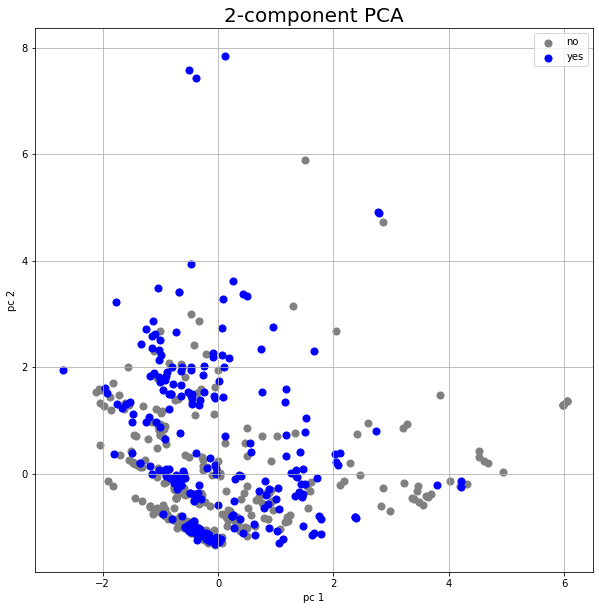

In [46]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc 1', fontsize = 10)
ax.set_ylabel('pc 2', fontsize = 10)
ax.set_title('2-component PCA', fontsize = 20)
targets = [0, 1]
colors = ['gray', 'blue']
for target, color in zip(targets,colors):
    ipc = res['y'] == target
    ax.scatter(res.loc[ipc, 'pc 1'], res.loc[ipc, 'pc 2'], c = color, s = 50)
ax.legend(['no', 'yes'])
ax.grid()

In [47]:
err_train_pc = []
err_test_pc = []
for i in range(1,51):
    pca = PCA(n_components=i)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(pc_train, y_train)
    y_train_predict = knn.predict(pc_train)
    y_test_predict = knn.predict(pc_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    err_train_pc.append(err_train)
    err_test_pc.append(err_test)


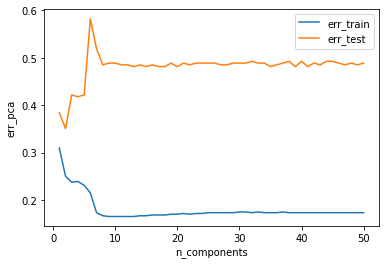

In [48]:
plt.plot(range(1,51), err_train_pc, label='err_train')
plt.plot(range(1,51), err_test_pc, label='err_test')
plt.xlabel('n_components')

plt.ylabel('err_pca')
plt.legend()

### I'm in trouble now according to graph above

In [49]:
pca = PCA(n_components=2)
pc_train = pca.fit_transform(X_train)
pc_test = pca.fit_transform(X_test)
scores = []
kf = KFold(n_splits=10, random_state=42, shuffle=True)

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    tmp_scores = cross_val_score(knn, pc_train, y_train, cv=kf.split(pc_train), scoring='accuracy')
    tmp_scores = tmp_scores.mean()
#     print(k, tmp_scores)
    scores.append(tmp_scores)

In [50]:
opt_nightbors = scores.index(max(scores))+1
opt_nightbors

8

In [51]:
knn = KNeighborsClassifier(n_neighbors = opt_nightbors).fit(X_train, y_train)

In [52]:
err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.17495987158908508 0.21641791044776118
